# 💡 딥러닝(1) 과제

Q. 단층 퍼셉트론과 다층 퍼셉트론의 가장 큰 차이점에 대해 설명해주세요.
<br>
A.다층 퍼셉트론에는 은닉층이 존재하고 단층 퍼셉트론에는 없다.
<br><br>
Q. 단층 퍼셉트론의 한계는 무엇이며, 이를 해결하기 위한 방법은 무엇인가요?
<br>
A. 선형분류문제밖에 풀지 못한다. 입력층과 출력층 사이에 은닉층을 추가해 비선형문제를 해결할 수 있다.
<br><br>
Q. 딥러닝 학습 과정의 목적이 무엇인지에 대해 설명해주세요.
<br>
A. 컴퓨터가 스스로 답을 잘 찾을 수 있게 하는 것이 목적이다.


#### 빈 칸을 채워주세요.
역전파는 ( )을 이용하여 손실 함수에 대한 각 가중치의 그래디언트를 효율적으로 계산하는 알고리즘이다.

#### T/F를 골라주시고, **F일 경우 이유까지** 함께 작성해주세요.
(1) 딥러닝에서 순전파와 역전파는 상호 의존 관계이다.<br>
T
 <br><br>
(2) 신경망에서 활성 함수가 선형일 경우, 층을 여러 개 쌓더라도 복잡한 비선형 관계를 효과적으로 학습할 수 있다.<br>F<br> 여러 개를 쌓더라도 선형이기 때문에 비선형 관계를 효과적으로 학습할 수 없다
<br>
<br>
(3) 경사하강법은 역전파를 통해 계산된 기울기를 활용하여 가중치를 업데이트하는 데 사용되는 최적화 알고리즘이다.<br>T


## 다층 퍼셉트론으로 MNIST(손글씨 이미지) 분류하기

### 1. 데이터 로드

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

MNIST 데이터셋을 불러옵니다. cache=True는 다운로드한 데이터를 로컬 디스크에 저장하여 다음 호출 때 빠르게 로드합니다.

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

첫번째 샘플 출력해봅시다.

In [3]:
mnist.data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

#### 샘플을 출력해보니 어떤 숫자 같나요???!!
#### 실제 레이블을 확인해봅시다~

In [4]:
mnist.target[0]

'5'

문자열인 레이블 데이터 타입을 정수형으로 바꾸어 줍니다.

In [6]:
mnist.target = mnist.target.astype(np.int8)

학습 효율을 위해 모든 이미지 데이터를 0-255 범위에서 0-1 범위로 정규화합니다.\
레이블 데이터를 y에 저장합니다.

In [7]:
X = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

정규화된 첫 번째 이미지 데이터와 레이블을 출력합니다.

In [8]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
y[0]

5

해당 데이터 샘플 시각화까지 진행해봅니다. 

이 이미지 데이터의 레이블은 5이다


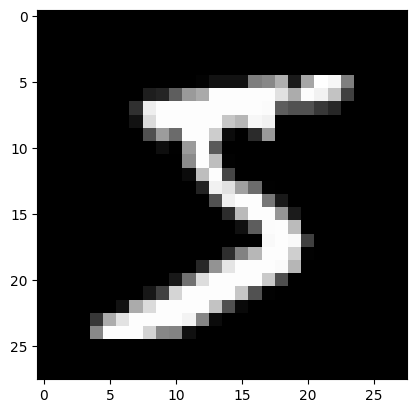

In [10]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

### 2. 훈련 데이터와 테스트 데이터의 분리

MNIST 데이터셋을 불러오고, 이를 훈련 세트와 테스트 세트로 분할합니다.

In [11]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)

In [13]:
# 텐서로 변환
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# TensorDataset 객체 생성
ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

# DataLoader 객체 생성
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

### 3. 다층 퍼셉트론 

In [14]:
from torch import nn
from torch import optim

784(28x28)개의 입력 뉴런, 100개의 은닉 뉴런, 그리고 10개의 출력 뉴런(0~9)을 가지는 다층 퍼셉트론을 구성합니다.\
ReLU 활성화 함수를 사용하여 비선형성을 추가하고, 최종 출력은 10개의 클래스에 대한 점수를 제공합니다.

In [17]:
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


크로스 엔트로피 손실 함수를 사용하여 모델의 예측과 실제 레이블 사이의 차이를 계산합니다. Adam 최적화 기법을 사용하여 모델의 가중치를 업데이트합니다.

In [19]:
# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)

데이터 로더에서 미니배치를 하나씩 꺼내 모델을 훈련합니다.\
 손실을 계산하고 역전파를 통해 기울기(gradient)를 계산한 다음, 최적화기를 사용하여 가중치를 업데이트합니다.

In [31]:
# 총 3번의 에포크 동안 모델 학습
epochs = 3

for epoch in range(epochs):
  for data, targets in loader_train:
    optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
    y_pred = model(data)        # 순전파 연산으로 예측값 계산
    loss = loss_fn(y_pred, targets)  # 손실 함수로 비용 계산
    loss.backward()            # 역전파 연산으로 기울기 계산
    optimizer.step()          # 옵티마이저를 통해 파라미터 업데이트

  print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch + 1, 3, loss.item()))


Epoch    1/3 Cost: 0.158848
Epoch    2/3 Cost: 0.095984
Epoch    3/3 Cost: 0.030285


테스트 데이터에 대해서 평가를 진행해봅시다. 모델을 평가하기 위해 추론 모드로 설정하고, 데이터 로더를 통해 테스트 데이터에 대한 예측을 수행합니다.\
예측된 클래스와 실제 클래스를 비교하여 정확도를 계산합니다.

In [32]:
model.eval()  # 신경망을 추론 모드로 전환
correct = 0

# 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
with torch.no_grad():  # 추론 과정에는 미분이 필요없음
    for data, targets in loader_test:

        outputs = model(data)  # 데이터를 입력하고 출력을 계산

        # 추론 계산
        _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
        correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

# 정확도 출력
data_num = len(loader_test.dataset)  # 데이터 총 건수
print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct, data_num, 100. * correct / data_num))


테스트 데이터에서 예측 정확도: 9590/10000 (96%)



평가 코드를 살펴봅시다. 신경망 모델을 추론 모드로 설정하여 테스트 데이터에 대한 성능을 평가합니다. 함수는 **model.eval()** 을 호출해 모델을 추론 모드로 전환합니다. 이는 모델 내의 일부 계층들이 학습과 추론 시 다르게 동작할 수 있기 때문에 필요한 설정입니다.

**torch.no_grad()** 컨텍스트 매니저는 이어지는 코드 블록에서 기울기 계산을 비활성화하여 메모리 사용량을 줄이고 계산 속도를 향상시킵니다. 이는 테스트 시에는 모델을 업데이트하지 않기 때문에 기울기를 추적할 필요가 없기 때문입니다.

데이터로더 loader_test에서 미니배치 단위로 데이터와 레이블을 추출하며, 모델은 각 데이터 배치를 받아 해당 데이터의 출력 outputs을 계산합니다. **torch.max(outputs.data, 1)** 는 각 예측에 대해 가장 높은 확률을 가진 클래스를 찾아내고, 이는 모델이 예측한 레이블이 됩니다.

예측한 레이블 predicted와 실제 레이블 targets을 비교하여 일치하는 개수를 세어 correct에 더합니다. 마지막으로 전체 데이터 개수 data_num 대비 정확하게 예측한 데이터의 비율을 계산하여 화면에 출력합니다. 이 비율은 모델의 정확도를 나타냅니다

<br><br><br>
이제 임의의 데이터에 대해서 특정 인덱스의 테스트 이미지를 모델에 전달하여 예측 결과를 얻어봅시다. <br>그 결과를 출력하고, 해당 이미지를 시각화하여 정답 레이블과 함께 보여줍니다. <br>이를 통해 모델의 예측이 얼마나 정확한지 직접 확인할 수 있습니다.

예측 결과 : 7
이 이미지 데이터의 정답 레이블은 7입니다


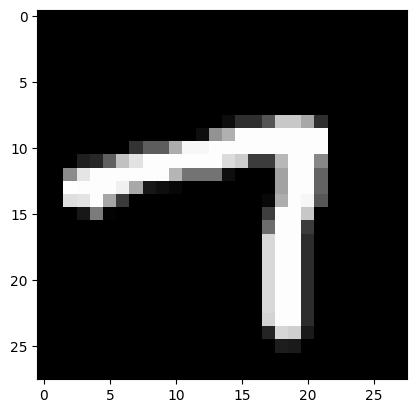

In [35]:
index = 2018

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))

### 수고 많으셨습니다~